In [1]:
# importing pandas and numpy
import pandas as pd
import numpy as np

In [2]:
# importing Dataset
data = pd.read_csv('D:\Water Quality Analysis and Prediction\water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Data Analysis 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
# Checking for Null Values
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
# Dropping Null Values
data= data.dropna()

In [6]:
data.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

##### Not potable is much more potable(1200 > 811) so we need to balance the data to prevent bias

In [7]:
notpotable  = data[data['Potability']==0]
potable = data[data['Potability']==1]  

from sklearn.utils import resample
df_minority_upsampled = resample(potable, replace = True, n_samples = 1200) 

from sklearn.utils import shuffle
data = pd.concat([notpotable, df_minority_upsampled])
data = shuffle(data) 

In [8]:
# Data Shape
data.shape

(2400, 10)

In [9]:
data.Potability.value_counts()

0    1200
1    1200
Name: Potability, dtype: int64

# Exploratory Data Analysis (EDA)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Plot

<AxesSubplot:>

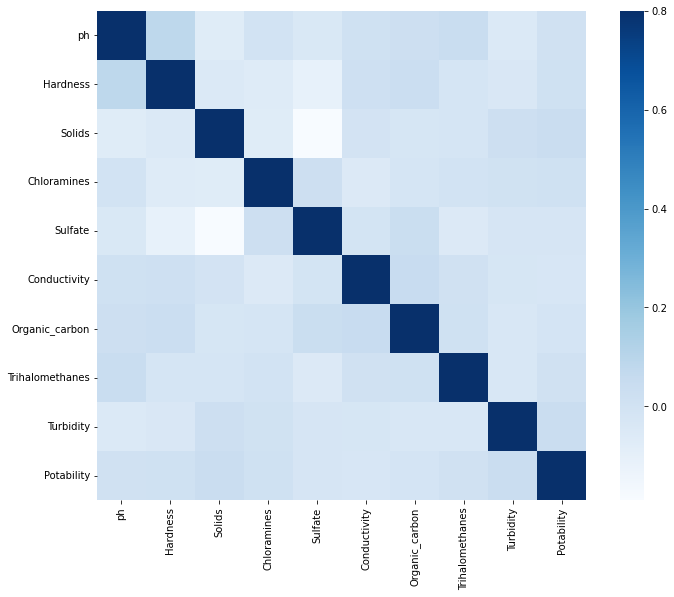

In [11]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="Blues")

<AxesSubplot:>

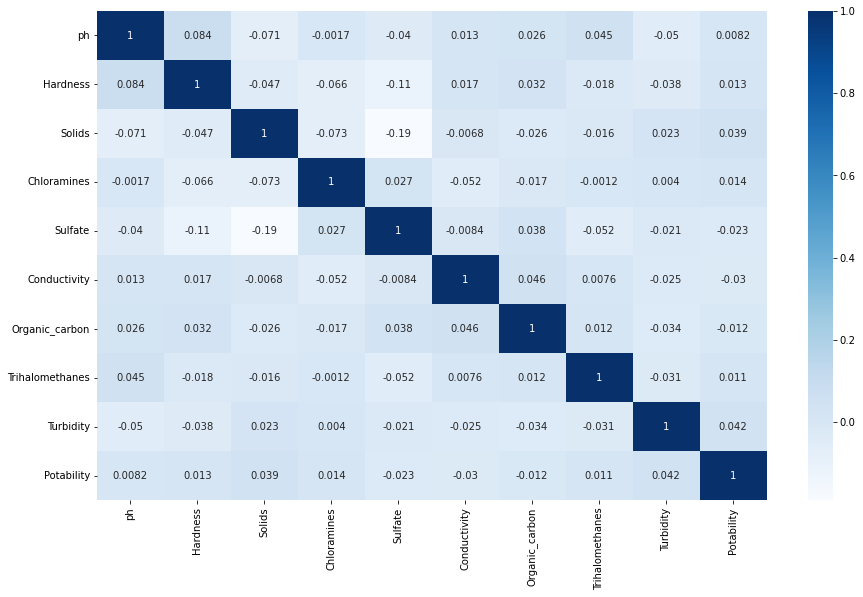

In [12]:
# Heatmap with Correlation
plt.figure(figsize = (15,9))
sns.heatmap(data.corr(), annot = True,cmap="Blues")

In [13]:
corr = data.corr()
corr["Potability"].sort_values(ascending=False)

Potability         1.000000
Turbidity          0.041658
Solids             0.038913
Chloramines        0.014332
Hardness           0.013383
Trihalomethanes    0.010517
ph                 0.008231
Organic_carbon    -0.012027
Sulfate           -0.023165
Conductivity      -0.029795
Name: Potability, dtype: float64

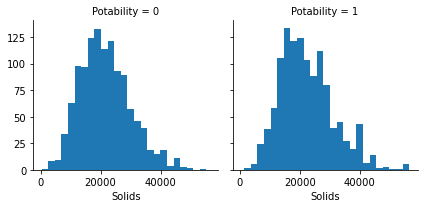

In [14]:
# normal distribution of Target Variables
g = sns.FacetGrid(data, col='Potability')
g.map(plt.hist, 'Solids', bins=25)

#### Skewness of Each of the Column

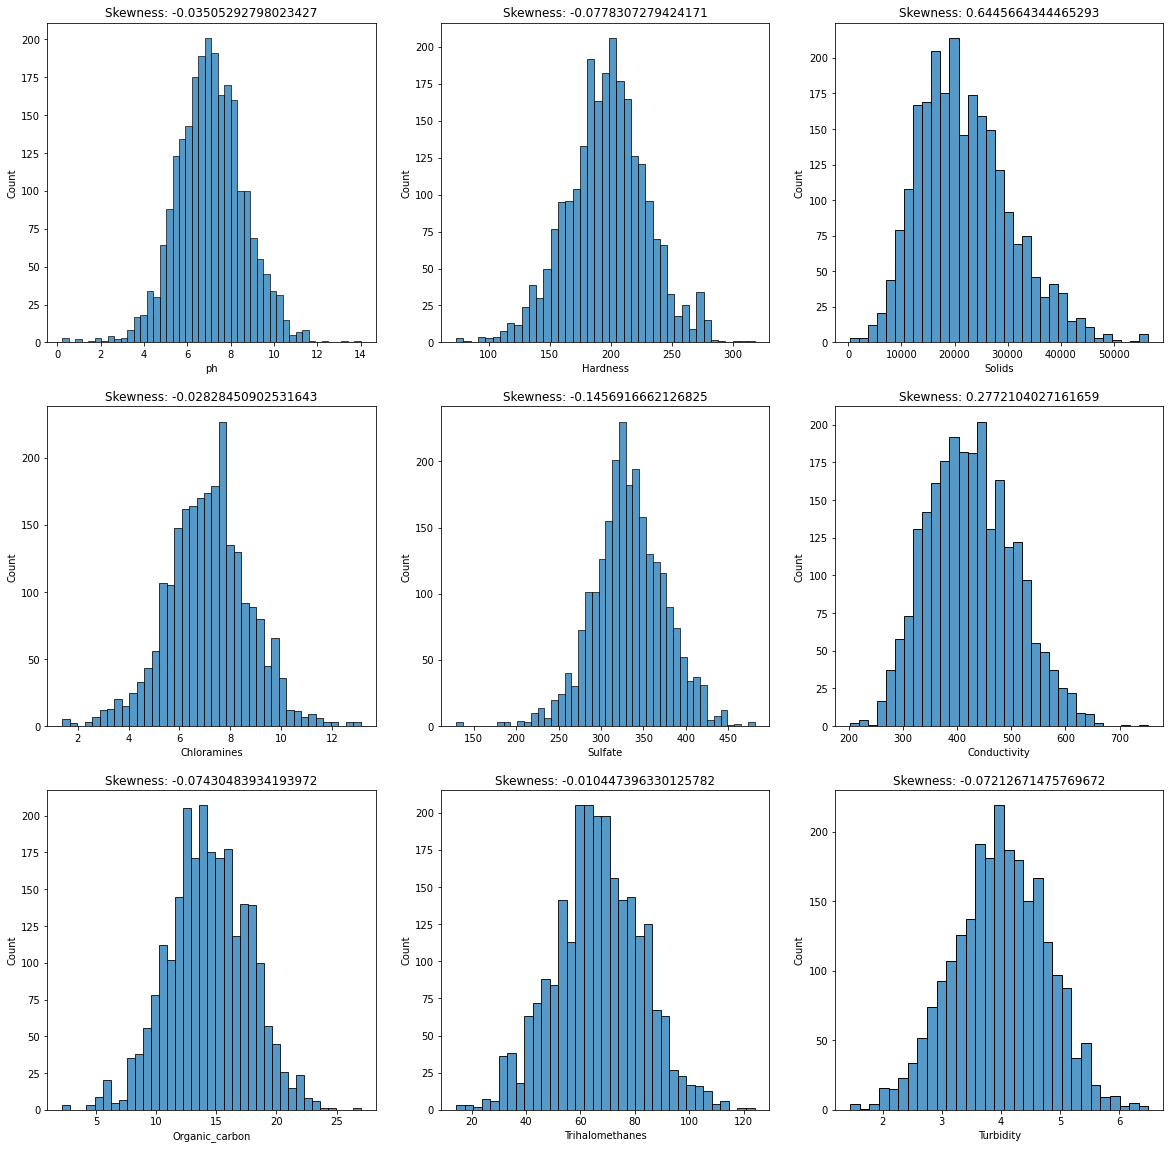

In [15]:
# ploting the skewness of each parameters
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
cols = np.array(data.columns[:9]).reshape(3, 3)


for i in range(3):
    for j in range(3):
        skewness = f"Skewness: {data[cols[i][j]].skew()}" # it should be between -1 to 1
        ax = sns.histplot(data[cols[i, j]], ax=axs[i, j])
        ax.set_title(skewness)
        
plt.show()

#### Boxplot of Each Column

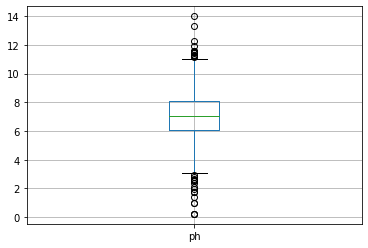

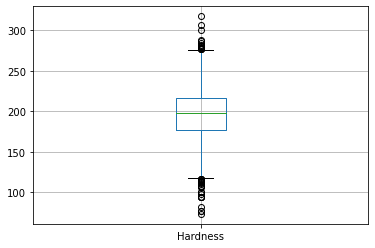

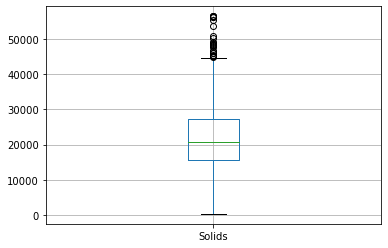

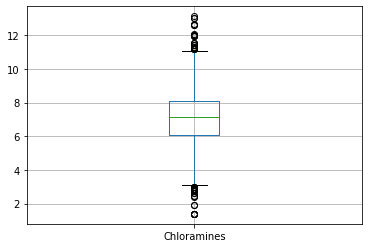

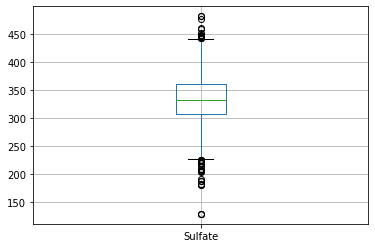

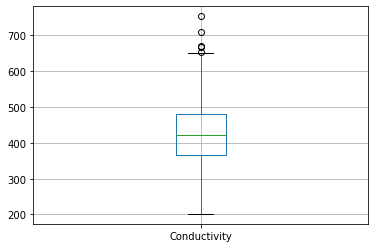

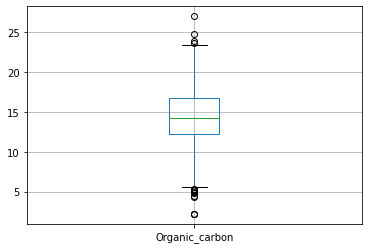

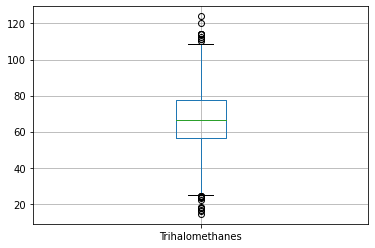

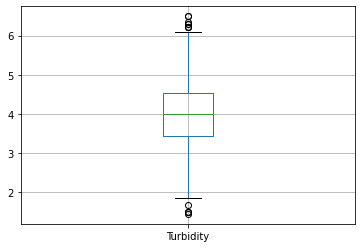

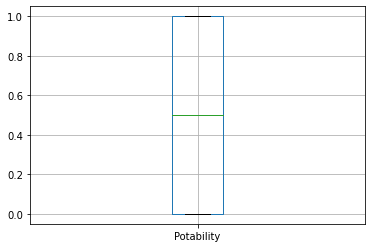

In [16]:
for column in data:
    plt.figure()
    data.boxplot([column])

# Applying Machine Learning Algorithms

In [17]:
#importing neccesary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB

In [18]:
x = data.drop(['Potability'], axis = 1)
y = data['Potability']

In [19]:
#  StandardScaler is used to resize the distribution of values so that the mean of the observed values 
#  is 0 and the standard deviation is 1.
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
col= x.columns
x[col] = st.fit_transform(x[col])
x[col]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
108,-0.629098,-0.196381,0.668298,-0.425705,0.355068,-2.248942,0.082578,0.433184,-0.013565
355,-0.419130,-0.227290,-1.150409,0.272970,0.765009,0.975890,-0.147112,1.885720,-0.324402
316,0.475350,-1.195109,0.155438,1.210039,-0.184839,-1.637203,0.842813,0.380017,-0.576411
2864,1.231282,2.041206,-0.757657,-0.406767,0.520606,1.712029,2.291408,-0.306344,-0.014184
1691,0.417267,-0.833893,1.885177,-0.682526,-0.828699,1.262946,0.510188,0.525394,1.489693
...,...,...,...,...,...,...,...,...,...
2230,2.121932,2.017697,1.972648,-2.430827,-1.100093,0.603693,-0.315802,-0.070119,2.259015
2632,1.991543,2.742867,-1.709381,1.678599,-0.258895,0.159289,-0.443733,0.762730,0.819653
1523,-0.112911,1.889413,1.551547,-1.393002,-2.959486,-1.336380,-0.118713,-0.036101,-0.152273
1664,-0.476492,0.536395,-0.845108,-0.338176,-0.391991,-0.682049,-0.638180,1.069265,-0.252379


In [20]:
# Train test splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1)

In [21]:
# ML models
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()

In [22]:
# decision Tree, randomforest and naive bayes Grid search
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)


In [23]:
# Best Parameters for Decisoin Tree, Random Forest and Naive Bayes
grid_dt.fit(X_train, Y_train)
grid_rf.fit(X_train, Y_train)
nbModel_grid.fit(X_train, Y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for Random Forest:", nbModel_grid.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 41, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}
Best parameters for Random Forest: {'var_smoothing': 0.1873817422860384}


# Decision Tree Algorithm 

In [24]:
# metrics of the model
target_names = ['Potability 0','Potability 1']

dt.fit(X_train, Y_train)    
y_pred = dt.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print('Decision Tree {:.2f} Accuracy'.format(accuracy))
report = classification_report(Y_test, y_pred,target_names=target_names)
print(report)
tp,fn,fp,tn = confusion_matrix(Y_test,y_pred).flatten()
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity,'\n\n\n\n\n')

Decision Tree 0.79 Accuracy
              precision    recall  f1-score   support

Potability 0       0.83      0.74      0.78       123
Potability 1       0.75      0.84      0.79       117

    accuracy                           0.79       240
   macro avg       0.79      0.79      0.79       240
weighted avg       0.79      0.79      0.79       240

Sensitivity:  0.7398373983739838
Specificity:  0.8376068376068376 







# Random Forest Algorithm

In [25]:
# metrics of the model
rf.fit(X_train, Y_train)    
y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print('Random Forest {:.2f} Accuracy'.format(accuracy))
report = classification_report(Y_test, y_pred,target_names=target_names)
print(report)
tp,fn,fp,tn = confusion_matrix(Y_test,y_pred).flatten()
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity,'\n\n\n\n\n')

Random Forest 0.90 Accuracy
              precision    recall  f1-score   support

Potability 0       0.86      0.96      0.90       123
Potability 1       0.95      0.83      0.89       117

    accuracy                           0.90       240
   macro avg       0.90      0.89      0.90       240
weighted avg       0.90      0.90      0.90       240

Sensitivity:  0.959349593495935
Specificity:  0.8290598290598291 







# Naive Bayes Algorithm

In [26]:
# metrics of the model
nb.fit(X_train, Y_train)    
y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print('Naive Bayes {:.2f} Accuracy'.format(accuracy))
report = classification_report(Y_test, y_pred,target_names=target_names)
print(report)
tp,fn,fp,tn = confusion_matrix(Y_test,y_pred).flatten()
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity,'\n\n\n\n\n')

Naive Bayes 0.90 Accuracy
              precision    recall  f1-score   support

Potability 0       0.86      0.96      0.90       123
Potability 1       0.95      0.83      0.89       117

    accuracy                           0.90       240
   macro avg       0.90      0.89      0.90       240
weighted avg       0.90      0.90      0.90       240

Sensitivity:  0.959349593495935
Specificity:  0.8290598290598291 







# Roc-Graph

In [27]:
# Prediction probabilities 
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
dt_probs = dt_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [28]:
# Computing AUROC and ROC curve values
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
dt_auc = roc_auc_score(Y_test, dt_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

In [29]:
# Calculate AUROC
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.924
Decision Tree: AUROC = 0.789
Naive Bayes: AUROC = 0.594


In [30]:
# roc curve
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
dt_fpr, dt_tpr, _ = roc_curve(Y_test, dt_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

# Plot the ROC curve

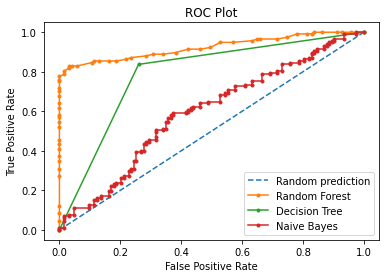

In [31]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest ' % rf_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree ' % dt_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes ' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()